In [1]:
pwd

'/home/dave/dev/PB/Photogrammetry_20181119/Photogrammetry/mirrorfithmc'

In [1]:
cd "/Users/daveboettger/Google Drive/PbGeneral/Photogrammetry/mirrorfithmc"

/Users/daveboettger/Google Drive/PbGeneral/Photogrammetry/mirrorfithmc


In [1]:
import sys
sys.path.append('.')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
import test_cloud_align as tc

In [2]:
model=tc.load_multi_model_moons()

Align_DS2_to_DS1 fitmap is {'tx': True, 'ty': True, 'tz': True, 'rx': True, 'ry': True, 'rz': True, 's': True, 'rescale_errors': True}
Align_DS3_to_DS1 fitmap is {'tx': True, 'ty': True, 'tz': True, 'rx': True, 'ry': True, 'rz': True, 's': True, 'rescale_errors': True}


In [3]:
with model as model:
    trace=pm.load_trace('moons_alignments/multigaussianalign_xyzerror/')

In [4]:
model.vars,trace.varnames,model.test_point

([MultiAlign_error_scale_DS1_lowerbound__,
  MultiAlign_error_scale_DS2_lowerbound__,
  MultiAlign_error_scale_DS3_lowerbound__,
  Align_DS2_to_DS1_tx,
  Align_DS2_to_DS1_ty,
  Align_DS2_to_DS1_tz,
  Align_DS2_to_DS1_rx,
  Align_DS2_to_DS1_ry,
  Align_DS2_to_DS1_rz,
  Align_DS2_to_DS1_s,
  Align_DS3_to_DS1_tx,
  Align_DS3_to_DS1_ty,
  Align_DS3_to_DS1_tz,
  Align_DS3_to_DS1_rx,
  Align_DS3_to_DS1_ry,
  Align_DS3_to_DS1_rz,
  Align_DS3_to_DS1_s],
 ['MultiAlign_error_scale_DS1_lowerbound__',
  'MultiAlign_error_scale_DS2_lowerbound__',
  'MultiAlign_error_scale_DS3_lowerbound__',
  'Align_DS2_to_DS1_tx',
  'Align_DS2_to_DS1_ty',
  'Align_DS2_to_DS1_tz',
  'Align_DS2_to_DS1_rx',
  'Align_DS2_to_DS1_ry',
  'Align_DS2_to_DS1_rz',
  'Align_DS2_to_DS1_s',
  'Align_DS3_to_DS1_tx',
  'Align_DS3_to_DS1_ty',
  'Align_DS3_to_DS1_tz',
  'Align_DS3_to_DS1_rx',
  'Align_DS3_to_DS1_ry',
  'Align_DS3_to_DS1_rz',
  'Align_DS3_to_DS1_s',
  'MultiAlign_error_scale_DS1',
  'MultiAlign_error_scale_DS2',
  '

In [5]:
errorscale1=trace.get_values('MultiAlign_error_scale_DS1')

In [6]:
np.mean(np.abs(errorscale1),axis=0)

array([2.33999059, 4.81382334, 0.80577116])

In [7]:
errorscale2=trace.get_values('MultiAlign_error_scale_DS2')

In [8]:
np.mean(np.abs(errorscale2),axis=0)

array([0.59611901, 1.90050301, 0.48541609])

In [9]:
errorscale3=trace.get_values('MultiAlign_error_scale_DS3')

In [10]:
np.mean(np.abs(errorscale3),axis=0)

array([2.6255734 , 7.05143474, 0.92719312])

In [11]:
xlevels=tc.mf.util.find_credible_levels(x=errorscale2[:,0],y=errorscale3[:,0])
ylevels=tc.mf.util.find_credible_levels(errorscale2[:,1],errorscale3[:,1])
zlevels=tc.mf.util.find_credible_levels(errorscale2[:,2],errorscale3[:,2])
xlevels, ylevels, zlevels

([0.0,
  0.7583743428660441,
  2.275123028598133,
  12.133989485860521,
  44.74408622911314],
 [0.0,
  0.40580402223459927,
  0.8116080444711362,
  4.463844244580594,
  17.043768933857045],
 [0.0,
  6.637344271984211,
  13.274688543969482,
  73.01078699183059,
  298.6804922392906])

Text(0, 0.5, 'Errorscale3')

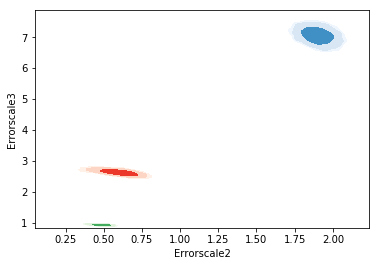

In [12]:
ax = sns.kdeplot(errorscale2[:,0], errorscale3[:,0],cmap="Reds",shade=True, shade_lowest=False, levels=xlevels)
ax = sns.kdeplot(errorscale2[:,1], errorscale3[:,1],cmap="Blues",shade=True, shade_lowest=False, levels=ylevels)
ax = sns.kdeplot(errorscale2[:,2], errorscale3[:,2],cmap="Greens",shade=True, shade_lowest=False, levels=zlevels)
ax.set_xlabel('Errorscale2')
ax.set_ylabel('Errorscale3')

In [13]:
diffs,errors = model.calc_diff(trace=trace)

In [14]:
diffs.keys()

dict_keys(['DS1-DS2', 'DS1-DS3', 'DS2-DS3'])

In [15]:
sigerror = {}
for k in diffs:
    sigerror[k] = np.mean(diffs[k]/errors[k], axis=0)


In [16]:
np.shape(sigerror['DS1-DS3'])

(3, 1627)

In [17]:
for k in sigerror:
    print(k,np.sum(np.abs(sigerror[k].flat)<1)/len(sigerror[k].flat))

DS1-DS2 0.7113296455644336
DS1-DS3 0.692481048965376
DS2-DS3 0.704978488014751


In [18]:
for k in sigerror:
    print(k,np.sum(np.abs(sigerror[k].flat)<2)/len(sigerror[k].flat))

DS1-DS2 0.9649661954517517
DS1-DS3 0.9467322270026634
DS2-DS3 0.9543126408522844


(array([  4.,   6.,  16.,  19.,  61., 106., 229., 376., 558., 683., 707.,
        692., 553., 410., 209., 127.,  66.,  33.,  10.,   8.,   3.,   2.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.79500925, -3.43518145, -3.07535365, -2.71552585, -2.35569805,
        -1.99587025, -1.63604245, -1.27621465, -0.91638685, -0.55655905,
        -0.19673124,  0.16309656,  0.52292436,  0.88275216,  1.24257996,
         1.60240776,  1.96223556,  2.32206336,  2.68189116,  3.04171896,
         3.40154676,  3.76137456,  4.12120236,  4.48103016,  4.84085796,
         5.20068576,  5.56051356,  5.92034136,  6.28016916,  6.63999696,
         6.99982476]),
 <a list of 30 Patch objects>)

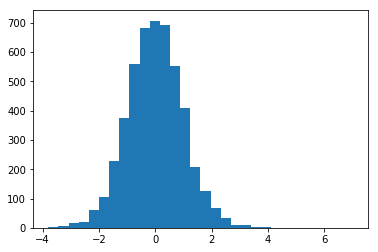

In [23]:
plt.hist(sigerror['DS2-DS3'].flat,30)

In [25]:
diffdists = {}
for k in diffs:
    diffdists[k] = np.linalg.norm(diffs[k],axis=1)

In [27]:
np.shape(diffdists['DS1-DS2'])

(8000, 1627)

In [29]:
meandiffdists = {}
for k in diffdists:
    meandiffdists[k] = np.mean(diffdists[k],axis=0)

(array([ 56., 194., 325., 363., 292., 180., 102.,  57.,  31.,  11.,   6.,
          5.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00154133, 0.00613556, 0.01072979, 0.01532402, 0.01991826,
        0.02451249, 0.02910672, 0.03370095, 0.03829518, 0.04288941,
        0.04748364, 0.05207787, 0.0566721 , 0.06126633, 0.06586056,
        0.0704548 , 0.07504903, 0.07964326, 0.08423749, 0.08883172,
        0.09342595]),
 <a list of 20 Patch objects>)

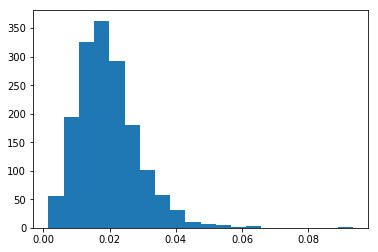

In [35]:
plt.hist(meandiffdists['DS1-DS2'],20)